# Setup

In [1]:
%run setup.ipynb

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_merge = pd.read_csv('Datasets/df_merge.csv')

In [4]:
df_merge = df_merge.rename(columns={"doc_speaker's-trustworthiness_index": "doc_speaker_trustworthiness_index"})

In [5]:
df_merge["fre_label"]  = 0
for index, row in df_merge.iterrows():
    if row["fre"] >= 70:
        df_merge.loc[index, "fre_label"] = "alta"
    elif row["fre"] >= 40:
        df_merge.loc[index, "fre_label"] = "media"
    else:
        df_merge.loc[index, "fre_label"] = "bassa"


In [6]:
df_merge["percentuale_parole_significative_label"]  = 0
for index, row in df_merge.iterrows():
    if row["percentuale_parole_significative"] >= 0.75:
        df_merge.loc[index, "percentuale_parole_significative_label"] = "alta"
    elif row["percentuale_parole_significative"] >= 0.5:
        df_merge.loc[index, "percentuale_parole_significative_label"] = "media"
    else:
        df_merge.loc[index, "percentuale_parole_significative_label"] = "bassa"


In [7]:
df_merge["quartile_val"] = 0
for index,row in df_merge.iterrows():
    if row["quartile"] == "wrong_false":
        df_merge.loc[index,"quartile_val"] = 1
    elif row["quartile"] == "other_false":
        df_merge.loc[index,"quartile_val"] = 2
    elif row["quartile"] == "correct_false":
        df_merge.loc[index,"quartile_val"] = 3
    elif row["quartile"] == "other":
        df_merge.loc[index,"quartile_val"] = 4
    elif row["quartile"] == "wrong_true":
        df_merge.loc[index,"quartile_val"] = 5
    elif row["quartile"] == "other_true":
        df_merge.loc[index,"quartile_val"] = 6
    elif row["quartile"] == "correct_true":
        df_merge.loc[index,"quartile_val"] = 7
    else:
        print("Error")

In [8]:
df_merge["doc_speaker_party_val"] = 0
for index,row in df_merge.iterrows():
    if row["doc_speaker_party"] == "DEM":
        df_merge.loc[index,"doc_speaker_party_val"] = 1

In [9]:
# creo i vari df per le analisi
def crea_df_per_analisi(df_analisi):
    df_all = df_analisi.copy()

    df_false = df_analisi[df_analisi["sovra"] == "pants-on-fire"]
    df_true = df_analisi[df_analisi["sovra"] == "true"]

    df_wrong_false = df_analisi[df_analisi["quartile"] == "wrong_false"]
    df_correct_false = df_analisi[df_analisi["quartile"] == "correct_false"]
    df_wrong_true = df_analisi[df_analisi["quartile"] == "wrong_true"]
    df_correct_true = df_analisi[df_analisi["quartile"] == "correct_true"]

    df_wrong = df_wrong_false.append(df_wrong_true)
    df_correct = df_correct_true.append(df_correct_false)

    DF_no_quartili = [["df_all",df_all],["df_false",df_false],["df_true",df_true],["df_wrong",df_wrong],["df_correct",df_correct]]
    DF = [["df_all",df_all],["df_false",df_false],["df_true",df_true],["df_wrong",df_wrong],["df_correct",df_correct],["df_wrong_false",df_wrong_false],["df_correct_false",df_correct_false],["df_correct_true",df_correct_true],["df_wrong_true",df_wrong_true]]
    return df_all, df_false, df_true , df_wrong, df_correct, df_wrong_false, df_correct_false, df_correct_true, df_wrong_true, DF_no_quartili, DF

In [10]:
df_all, df_false, df_true , df_wrong, df_correct, df_wrong_false, df_correct_false, df_correct_true, df_wrong_true, DF_no_quartili, DF = crea_df_per_analisi(df_merge)

# Analisi

In [11]:
variabili_interesse = ["scarto","quartile_val","doc_truthfulness_value"]
dimensioni_importanti = [# RQ2
                         "doc_speaker_party",
                         # RQ3
                         "doc_accuracy_index","doc_speaker_trustworthiness_index",
                         # RQ1
                         "age_ans_label","southern_border_ans_label","k_info_1_ans_label","k_ai_4_ans_label","s_com_1_v2_ans_label","s_info_4_ans_label"]
dimensioni_importanti1 = ["age_ans_label","southern_border_ans_label","k_info_1_ans_label","k_ai_4_ans_label","s_com_1_v2_ans_label","s_info_4_ans_label"]
dimensioni_importanti2 = ["doc_speaker_party"]
dimensioni_importanti3 = ["doc_accuracy_index","doc_speaker_trustworthiness_index"]

In [ ]:

for c in dimensioni_importanti:
    print(c,df_all[c].isna().sum())

df_all = df_all.dropna(subset=dimensioni_importanti)

for c in dimensioni_importanti:
    print(c,df_all[c].isna().sum())

In [ ]:
for dim in variabili_interesse:
    print(dim,dim in df_all.columns)

In [ ]:
for dim in dimensioni_importanti:
    print(dim,dim in df_all.columns)

Ci sono alcune linee guida generali che possono essere utilizzate per interpretare i valori di ω²:

- Valori molto bassi: solitamente ω² inferiore a 0,01 indica che la variabile indipendente ha una relazione molto debole o trascurabile con la variabile dipendente.

- Valori bassi: ω² compreso tra 0,01 e 0,06 indica una relazione debole o piccola tra la variabile indipendente e la variabile dipendente.

- Valori medi: ω² compreso tra 0,06 e 0,14 indica una relazione moderata tra la variabile indipendente e la variabile dipendente.

- Valori alti: ω² compreso tra 0,14 e 0,39 indica una relazione moderatamente forte tra la variabile indipendente e la variabile dipendente.

- Valori molto alti: ω² superiore a 0,39 indica una relazione molto forte tra la variabile indipendente e la variabile dipendente.

In [12]:
def crea_txt(dimensioni_importanti):
    txt = ""
    array = []
    for t in dimensioni_importanti:
        if "label" in t:
            txt = txt + f"""C({t}) + """
        else:   
            txt = txt + f"""{t} + """
        array.append([t])
    return txt[:-2]

In [ ]:
df_all

In [ ]:
df_all["doc_speaker_party_value"] = 0
for index,row in df_all.iterrows():
    if row["doc_speaker_party"] == "DEM":
        df_all.loc[index,"doc_speaker_party_value"] = 1
        



In [ ]:
index = "doc_speaker_party_value:doc_statement_date"
valori = index.split(":")
gr = []
for val in valori:
    if val[0:2] == "C(":
        val = val[2:-1]
        val = val[:-5]+"index"
    gr.append(val)
print(df_all[gr])

In [ ]:

# Creazione di due variabili di esempio
var1 = np.array([1, 2, 3, 4, 5])
var2 = np.array([6, 7, 8, 9, 10,5,2])

# Combina le due variabili in una singola variabile categorica
groups = np.concatenate([np.repeat('Group1', len(var1)), np.repeat('Group2', len(var2))])

# Crea un DataFrame per l'analisi
data = pd.DataFrame({'Values': np.concatenate([var1, var2]), 'Groups': groups})

# Applica la funzione pairwise_tukeyhsd
result = pairwise_tukeyhsd(data['Values'], data['Groups'])

# Stampa i risultati
print(result)

In [ ]:
data

In [ ]:

# Creazione di due variabili di esempio
var1 = np.array([1, 2, 3, 4, 5])
var2 = np.array([6, 7, 8, 9, 10,5,2])

# Combina le due variabili in una singola variabile categorica
groups = np.concatenate([np.repeat('Group1', len(var1)), np.repeat('Group2', len(var2))])

# Crea un DataFrame per l'analisi
data = pd.DataFrame({'Values': np.concatenate([var1, var2]), 'Groups': groups})

# Applica la funzione pairwise_tukeyhsd
result = pairwise_tukeyhsd(data['Values'], data['Groups'])

# Stampa i risultati
print(result)

In [13]:
def create_df_for_turkey_test (df,varibile_interesse,variabili_indipendenti):
    n = len(variabili_indipendenti)
    
    if n == 1:
    
        a = []

        for val in df[variabili_indipendenti[0]].unique():
            gr = df[df[variabili_indipendenti[0]] == val][varibile_interesse]
            a.append([val,gr.values])
            
        groups = []
        for valore in a:
            groups = np.concatenate([groups,np.repeat(valore[0], len(valore[1]))])

        data = pd.DataFrame({'Values': np.concatenate([valore[1] for valore in a]), 'Groups': groups})
    
    
    elif n == 2:
    
        a = []

        for val1 in df_all[variabili_indipendenti[0]].unique():
            for val2 in df_all[variabili_indipendenti[1]].unique():
                gr = df_all[(df_all[variabili_indipendenti[0]] == val1) & (df_all[variabili_indipendenti[1]] == val2)][varibile_interesse]
                
                a.append([str(val1)+":"+str(val2),gr.values])
                
        groups = []
        for valore in a:
            groups = np.concatenate([groups,np.repeat(valore[0], len(valore[1]))])

        data = pd.DataFrame({'Values': np.concatenate([valore[1] for valore in a]), 'Groups': groups})
    
    elif n == 3:
        
        a = []
        
        for val1 in df_all[variabili_indipendenti[0]].unique():
            for val2 in df_all[variabili_indipendenti[1]].unique():
                for val3 in df_all[variabili_indipendenti[2]].unique():
                    gr = df_all[(df_all[variabili_indipendenti[0]] == val1) & (df_all[variabili_indipendenti[1]] == val2) & (df_all[variabili_indipendenti[2]] == val3)][varibile_interesse]
                    
                    a.append([str(val1)+":"+str(val2)+":"+str(val3),gr.values])
        
        groups = []
        for valore in a:
            groups = np.concatenate([groups,np.repeat(valore[0], len(valore[1]))])
        
        data = pd.DataFrame({'Values': np.concatenate([valore[1] for valore in a]), 'Groups': groups})
    
    
    return data

In [ ]:
create_df_for_turkey_test(df_all,"quartile_val",["doc_speaker_party","doc_statement_date"])

In [ ]:
create_df_for_turkey_test(df_all,"quartile_val",["doc_speaker_party"])

In [ ]:
df = df_all[["doc_speaker_party","doc_statement_date","quartile_val"]]
#df["gruppo"] = 0 

a = []

for val1 in df_all["doc_speaker_party"].unique():
    for val2 in df_all["doc_statement_date"].unique():
        gr = df_all[(df_all["doc_speaker_party"] == val1) & (df_all["doc_statement_date"] == val2)]["quartile_val"]
        
        a.append([str(val1)+":"+str(val2),gr.values])
        
groups = []
for valore in a:
    groups = np.concatenate([groups,np.repeat(valore[0], len(valore[1]))])

data = pd.DataFrame({'Values': np.concatenate([valore[1] for valore in a]), 'Groups': groups})

result = pairwise_tukeyhsd(data['Values'], data['Groups'])

print(result)
        

In [ ]:
data

In [ ]:
a[0]

In [ ]:
tukey_results = pairwise_tukeyhsd(endog=df_all["quartile_val"], 
                                    groups= df_all["doc_speaker_party_value"] + df_all["doc_statement_date"], 
                                    alpha=0.05)

In [ ]:
index = "doc_speaker_party_value:doc_statement_date"
valori = index.split(":")
gr = []
for val in valori:
    if val[0:2] == "C(":
        val = val[2:-1]
        val = val[:-5]+"index"
    gr.append(val)
print(gr)

In [83]:
def calcola_anova(variabili,df_riferimento,txt,valore_soglia):

    for variabile_interesse in variabili:
        for df in df_riferimento:
            
            
            results = ols(
                f'''
                    {variabile_interesse} ~ {txt} """
                '''
                , data=df[1]).fit()
            
            aov_table = sm.stats.anova_lm(results, typ=2)
            anova_table_v = anova_table(aov_table)
            if anova_table_v["omega_sq"].max() > valore_soglia:
                print("-" * 100)
                print(f"""{variabile_interesse} ~ {txt} in {df[0]}""")
                display(anova_table_v.sort_values(by="omega_sq", ascending=False).head(3))
                
            for index, row in anova_table_v.iterrows():
                if row["omega_sq"] > valore_soglia or row["PR(>F)"] < 0.05:
                    print(index)
                    
                    if ":" in index:
                        valori = index.split(":")
                        gr = []
                        for val in valori:
                            if val[0:2] == "C(":
                                val = val[2:-1]
                                val = val[:-5]+"index"
                            gr.append(val)
                        print(gr)
                        
                        data = create_df_for_turkey_test(df[1],variabile_interesse,gr)
                        
                        tukey_results = pairwise_tukeyhsd(data['Values'], data['Groups'],alpha=0.05)
                        
                    else:
                    
                        if index[0:2] == "C(":
                            index = index[2:-1]
                            index = index[:-5]+"index"
                            
                        data = create_df_for_turkey_test(df[1],variabile_interesse,[index])
                        
                        tukey_results = pairwise_tukeyhsd(data['Values'], data['Groups'],alpha=0.05)
                    
                    df_turkey = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])
                    display(df_turkey[df_turkey["reject"] == True].sort_values(by="p-adj", ascending=True).sort_values(by="meandiff", ascending=False).head(3))
        print("-" * 100)
        print("-" * 100)

Un'altra domanda: se voglio fare il turkey test userò la funzione pairwise_tukeyhsd. Come argomenti:
- endog = colonna variabile d'interesse 
- groups = colonne con variabili che devo controllare se 

In [ ]:
txt = "doc_speaker_party*doc_statement_date"
valore_soglia = 0.01
calcola_anova(variabili_interesse,DF_no_quartili,txt,valore_soglia)

In [ ]:
txt = crea_txt(dimensioni_importanti)
valore_soglia = 0.01
calcola_anova(variabili_interesse,DF_no_quartili,txt,valore_soglia)

In [ ]:
txt = crea_txt(dimensioni_importanti1)
valore_soglia = 0.01
calcola_anova(variabili_interesse,DF_no_quartili,txt,valore_soglia)

In [ ]:
txt = crea_txt(dimensioni_importanti2)
valore_soglia = 0.01
calcola_anova(variabili_interesse,DF_no_quartili,txt,valore_soglia)

In [ ]:
txt = crea_txt(dimensioni_importanti3)
valore_soglia = 0.01
calcola_anova(variabili_interesse,DF_no_quartili,txt,valore_soglia)

In [ ]:
txt

In [ ]:
dimensioni_importanti

In [ ]:
txt = "age_ans_label*doc_speaker_trustworthiness_index"
valore_soglia = 0.06
calcola_anova(variabili_interesse,DF_no_quartili,txt,valore_soglia)

In [ ]:
txt = "doc_speaker_party*doc_speaker_trustworthiness_index"
valore_soglia = 0.06
calcola_anova(variabili_interesse,DF_no_quartili,txt,valore_soglia)

In [ ]:
txt = "doc_speaker_party*age_ans_label"
valore_soglia = 0.06
calcola_anova(variabili_interesse,DF_no_quartili,txt,valore_soglia)

In [ ]:
txt = "doc_speaker_party*southern_border_ans_label*age_ans_label"
valore_soglia = 0.01
calcola_anova(variabili_interesse,DF_no_quartili,txt,valore_soglia)

In [ ]:
txt = "k_info_1_ans_label*k_ai_4_ans_label"
valore_soglia = 0.06
calcola_anova(variabili_interesse,DF_no_quartili,txt,valore_soglia)

In [ ]:
txt = "s_com_1_v2_ans_label*s_info_4_ans_label"
valore_soglia = 0.01
calcola_anova(variabili_interesse,DF_no_quartili,txt,valore_soglia)

In [ ]:
doc_speaker_party*doc_speaker_trustworthiness_index

In [ ]:
txt = "(consideration_ans_index + political_views_ans_label) * doc_speaker_party"
valore_soglia = 0.01
calcola_anova(variabili_interesse,DF_no_quartili,txt,valore_soglia)

In [ ]:
## interessante

txt = "(consideration_ans_index + political_views_ans_label) * (doc_speaker_party + doc_speaker_trustworthiness_index)"
valore_soglia = 0.01
calcola_anova(variabili_interesse,DF_no_quartili,txt,valore_soglia)

In [ ]:
## interessante

txt = "(s_com_1_v2_ans_label + k_ai_4_ans_label) * (k_info_1_ans_label + s_info_4_ans_label)"
valore_soglia = 0.01
calcola_anova(variabili_interesse,DF_no_quartili,txt,valore_soglia)

In [ ]:
## interessante

txt = "(doc_accuracy_index) * (doc_speaker_party + doc_speaker_trustworthiness_index + age_ans_label + southern_border_ans_label)"
valore_soglia = 0.06
calcola_anova(variabili_interesse,DF_no_quartili,txt,valore_soglia)

In [ ]:
## interessante taxes_ans_label

txt = "(taxes_ans_label) * (doc_speaker_party + doc_speaker_trustworthiness_index + age_ans_label + southern_border_ans_label)"
valore_soglia = 0.1
calcola_anova(variabili_interesse,DF_no_quartili,txt,valore_soglia)

In [ ]:
df_all.columns

## Caratteristiche worker

##### doc_truthfulness_value

In [ ]:
## visione politica

txt = "doc_speaker_trustworthiness_index * (southern_border_ans_label + doc_speaker_party + political_views_ans_label + consideration_ans_label)"
valore_soglia = 0.1
calcola_anova(["doc_truthfulness_value"],[["df_all",df_all],["df_false",df_false],["df_true",df_true]],txt,valore_soglia)

In [ ]:
df_false.groupby(["doc_speaker_trustworthiness_index"]).mean()["doc_truthfulness_value"]

In [ ]:
df_true.groupby(["doc_speaker_trustworthiness_index"]).mean()["doc_truthfulness_value"]

Se mi fido dell'autore tendo a dare in media dei valori più alti

In [ ]:
## domande

txt = "k_info_1_ans_label*(age_ans_label + southern_border_ans_label++k_ai_4_ans_label+s_com_1_v2_ans_label+s_info_4_ans_label)"
valore_soglia = 0.05
calcola_anova(["doc_truthfulness_value"],[["df_all",df_all],["df_false",df_false],["df_true",df_true]],txt,valore_soglia)


In [ ]:
## domande

txt = "k_info_1_ans_label*k_ai_4_ans_label "
valore_soglia = 0.05
calcola_anova(["doc_truthfulness_value"],[["df_all",df_all],["df_false",df_false],["df_true",df_true]],txt,valore_soglia)


In [ ]:
df_true.groupby(["k_info_1_ans_label"]).mean()["doc_truthfulness_value"]

In [ ]:
df_false.groupby(["k_info_1_ans_label"]).mean()["doc_truthfulness_value"]

La domanda è importante

##### scarto

In [ ]:
## visione politica

txt = "doc_speaker_party *  (southern_border_ans_label + doc_speaker_trustworthiness_index) * (political_views_ans_label + consideration_ans_label)"
valore_soglia = 0.05
calcola_anova(["scarto"],[["df_all",df_all],["df_false",df_false],["df_true",df_true]],txt,valore_soglia)

In [ ]:
df_false.groupby(["quartile","doc_speaker_trustworthiness_index"]).mean()["scarto"]

In [ ]:
df_true.groupby(["doc_speaker_trustworthiness_index"]).mean()["scarto"]

Per le news vere:
- se mi fido poco dello scrittore allora tendo ad allontanarmi molto dal GT

Per le fake news:
- se mi fido poco dello scrittore allora tendo ad allontanarmi molto dal GT

In [ ]:
## domande

txt = "k_info_1_ans_label*k_ai_4_ans_label "
valore_soglia = 0.05
calcola_anova(["scarto"],[["df_all",df_all],["df_false",df_false],["df_true",df_true]],txt,valore_soglia)


##### quartile_val

In [ ]:
## visione politica

txt = "doc_speaker_party +  (southern_border_ans_label + doc_speaker_trustworthiness_index) * (political_views_ans_label + consideration_ans_label)"
valore_soglia = 0.05
calcola_anova(["quartile_val"],[["df_all",df_all],["df_false",df_false],["df_true",df_true]],txt,valore_soglia)

SI nota che :
- doc_speaker_party è molto rilevante per l'individuazione dei gruppi
- doc_speaker_trustworthiness_index è molto importante per lo scarto e per doc_truthfulness_value => 

## Valutazione del Worker su Statement

In [17]:
df_all.columns

Index(['Unnamed: 0', 'worker_id', 'doc_id',
       'doc_fact_check_ground_truth_label',
       'doc_fact_check_ground_truth_value', 'sovra', 'quartile',
       'doc_truthfulness_value', 'mean', 'scarto', 'age_ans_index',
       'school_ans_index', 'taxes_ans_index', 'political_views_ans_index',
       'consideration_ans_index', 'southern_border_ans_index', 'age_ans_label',
       'school_ans_label', 'taxes_ans_label', 'political_views_ans_label',
       'consideration_ans_label', 'southern_border_ans_label',
       's_info_1_ans_index', 's_info_3_v2_ans_index', 's_info_4_ans_index',
       's_info_5_ans_index', 's_info_6_ans_index', 's_info_7_ans_index',
       's_com_1_v2_ans_index', 's_com_2_ans_index', 's_info_1_ans_label',
       's_info_3_v2_ans_label', 's_info_4_ans_label', 's_info_5_ans_label',
       's_info_6_ans_label', 's_info_7_ans_label', 's_com_1_v2_ans_label',
       's_com_2_ans_label', 'k_info_1_ans_index', 'k_info_2_ans_index',
       'k_info_3_ans_index', 'k_crea_2_a

In [21]:
variabili_interesse = ["quartile_val","doc_truthfulness_value"]

In [23]:


txt = "school_ans_label + taxes_ans_label + age_ans_label" 
valore_soglia = 0.01
calcola_anova(variabili_interesse,[["df_all",df_all],["df_false",df_false],["df_true",df_true]],txt,valore_soglia)

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
doc_truthfulness_value ~ school_ans_label + taxes_ans_label + age_ans_label in df_false


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
age_ans_label,28.678790,5.0,5.735758,2.020328,0.077867,0.050146,0.025200
taxes_ans_label,23.063821,8.0,2.882978,1.015482,0.425989,0.040328,0.000612
school_ans_label,11.981389,5.0,2.396278,0.844050,0.520148,0.020950,-0.003852


age_ans_label


,group1,group2,meandiff,p-adj,lower,upper,reject


----------------------------------------------------------------------------------------------------
doc_truthfulness_value ~ school_ans_label + taxes_ans_label + age_ans_label in df_true


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
age_ans_label,21.636517,5.0,4.327303,2.298866,0.046927,0.055697,0.031317
school_ans_label,16.510918,5.0,3.302184,1.754275,0.124529,0.042503,0.018187
taxes_ans_label,11.494132,8.0,1.436766,0.763278,0.635552,0.029588,-0.009132


school_ans_label


,group1,group2,meandiff,p-adj,lower,upper,reject


age_ans_label


,group1,group2,meandiff,p-adj,lower,upper,reject


----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


In [ ]:
## interessante taxes_ans_label

txt = "doc_accuracy_index * doc_informativeness_index * doc_comprehensibility_index * doc_precision_index * doc_confidence_index * doc_unbiasedness_index" 
valore_soglia = 0.1
calcola_anova(variabili_interesse,[["df_all",df_all],["df_false",df_false],["df_true",df_true]],txt,valore_soglia)

In [ ]:
## interessante taxes_ans_label

txt = "doc_accuracy_index + (doc_informativeness_index + doc_comprehensibility_index + doc_precision_index + doc_confidence_index) * doc_unbiasedness_index" 
valore_soglia = 0.1
calcola_anova(variabili_interesse,[["df_all",df_all],["df_false",df_false],["df_true",df_true]],txt,valore_soglia)

In [ ]:
df = df_all.groupby(["quartile"]).mean()["doc_speaker_trustworthiness_index"]
df = df.reset_index(inplace=False)
df = df[(df["quartile"] != "other_true") & (df["quartile"] != "other_false") & (df["quartile"] != "other")]
df.sort_values(by="doc_speaker_trustworthiness_index", ascending=False)
display(df)
sns.barplot(x="quartile", y="doc_speaker_trustworthiness_index", data=df,order=["correct_false","wrong_false","wrong_true","correct_true"])

In [ ]:
df = df_all.groupby(["quartile"]).mean()["doc_accuracy_index"]
df = df.reset_index(inplace=False)
df = df[(df["quartile"] != "other_true") & (df["quartile"] != "other_false") & (df["quartile"] != "other")]
df.sort_values(by="doc_accuracy_index", ascending=False)
display(df)
sns.barplot(x="quartile", y="doc_accuracy_index", data=df,order=["correct_false","wrong_false","wrong_true","correct_true"])

- Con i statement FALSE ha più importanza la doc_speaker_trustworthiness_index
- Con i statement TRUE ha più importanza la doc_accuracy_index

## Caratteristiche Statement

##### doc_truthfulness_value

In [24]:
## interessante sentiment_label e subjectivity_label e percentuale_parole_significative_label:subjectivity_label

txt = "sentiment_label * percentuale_parole_significative_label * subjectivity_label"
valore_soglia = 0.05
calcola_anova(["doc_truthfulness_value"],[["df_all",df_all],["df_false",df_false],["df_true",df_true]],txt,valore_soglia)

----------------------------------------------------------------------------------------------------
doc_truthfulness_value ~ sentiment_label * percentuale_parole_significative_label * subjectivity_label in df_all


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
subjectivity_label,1091.761095,4.0,272.940274,102.323856,4.045753e-23,0.236078,0.233636
sentiment_label:subjectivity_label,156.024118,8.0,19.503015,7.311576,8.143928e-06,0.033738,0.029107
sentiment_label:percentuale_parole_significative_label:subjectivity_label,127.197518,16.0,7.949845,2.980355,1.628298e-03,0.027505,0.018265


subjectivity_label


,group1,group2,meandiff,p-adj,lower,upper,reject


----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


In [ ]:
df_all.groupby(["sentiment_label","fre_label","percentuale_parole_significative_label"]).mean()[["doc_truthfulness_value"]].reset_index().sort_values(by="doc_truthfulness_value",ascending=False)

In [ ]:
df_all.groupby(["percentuale_parole_significative_label"]).mean()[["doc_truthfulness_value"]].reset_index()

In [ ]:
df_all.groupby(["sentiment_label"]).mean()[["doc_truthfulness_value"]].reset_index()

In [ ]:
df_all.groupby(["subjectivity_label"]).mean()[["doc_truthfulness_value"]].reset_index()

In [ ]:
sns.boxplot(x = "doc_truthfulness_value", y = "subjectivity", data = df_all)

##### scarto

In [ ]:
## interessante subjectivity_label:sentiment_label per lo scarto nel wrong 

# txt = "subjectivity_label * (sentiment_label + fre_label) * percentuale_parole_significative_label"
# valore_soglia = 0.05
# calcola_anova(["scarto"],[["df_all",df_all],["df_false",df_false],["df_true",df_true],["df_wrong",df_wrong],["df_correct",df_correct]],txt,valore_soglia)

In [ ]:
df_false.groupby(["scarto"]).mean()[["subjectivity","percentuale_parole_significative"]].reset_index()

##### quartile_val

In [ ]:
## TUTTO

## interessante 

txt = "(subjectivity_label  + sentiment_label) * percentuale_parole_significative_label * fre_label"
valore_soglia = 0.05
calcola_anova(["quartile_val"],[["df_all",df_all],["df_false",df_false],["df_true",df_true],["df_wrong",df_wrong],["df_correct",df_correct]],txt,valore_soglia)

In [16]:
## SOLO FALSE

## interessante 

txt = "subjectivity_label  * (sentiment_label + percentuale_parole_significative_label + fre_label)"
valore_soglia = 0.1
calcola_anova(["quartile_val"],[["df_all",df_all],["df_false",df_false]],txt,valore_soglia)

----------------------------------------------------------------------------------------------------
quartile_val ~ subjectivity_label  * (sentiment_label + percentuale_parole_significative_label + fre_label) in df_all


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
subjectivity_label,2318.380180,4.0,579.595045,589.765753,7.980774e-106,0.588262,0.587119
subjectivity_label:sentiment_label,149.911889,8.0,18.738986,19.067817,3.128207e-24,0.038038,0.036035
subjectivity_label:fre_label,122.657536,8.0,15.332192,15.601241,1.190665e-19,0.031123,0.029121


subjectivity_label


,group1,group2,meandiff,p-adj,lower,upper,reject
1,alta,media,1.2795,0.0,0.8323,1.7267,True
2,alta,media-alta,0.9643,0.0,0.4716,1.4570,True
4,bassa,media,0.6891,0.0,0.4318,0.9464,True


----------------------------------------------------------------------------------------------------
quartile_val ~ subjectivity_label  * (sentiment_label + percentuale_parole_significative_label + fre_label) in df_false


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
subjectivity_label:percentuale_parole_significative_label,37.049746,4.0,9.262436,45.075822,1.983987e-26,0.254306,0.248314
subjectivity_label:fre_label,32.242744,4.0,8.060686,39.227480,8.550664e-24,0.221311,0.215366
subjectivity_label:sentiment_label,21.225855,8.0,2.653232,12.912003,8.711154e-11,0.145692,0.134220


subjectivity_label:sentiment_label
['subjectivity_label', 'sentiment_label']


,group1,group2,meandiff,p-adj,lower,upper,reject
30,alta:positive,media-alta:positive,4.00,0.0,2.7126,5.2874,True
35,alta:positive,media:positive,3.75,0.0,2.5287,4.9713,True
33,alta:positive,media-bassa:positive,3.00,0.0,1.7663,4.2337,True


subjectivity_label:percentuale_parole_significative_label
['subjectivity_label', 'percentuale_parole_significative_label']


,group1,group2,meandiff,p-adj,lower,upper,reject
3,alta:media,media-alta:alta,3.7143,0.0,2.4620,4.9666,True
1,alta:media,bassa:bassa,3.7143,0.0,2.4620,4.9666,True
30,bassa:media,media-alta:alta,3.2808,0.0,2.0927,4.4689,True


subjectivity_label:fre_label
['subjectivity_label', 'fre_label']


,group1,group2,meandiff,p-adj,lower,upper,reject
11,alta:alta,media:alta,4.5,0.0,3.3131,5.6869,True
6,alta:alta,media-alta:bassa,4.5,0.0,3.1295,5.8705,True
5,alta:alta,media-alta:alta,4.0,0.0,2.7489,5.2511,True


----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


In [ ]:
df_false.groupby("quartile").mean()[["percentuale_parole_significative","fre","sentiment", "subjectivity"]]

In [15]:
## SOLO TRUE

## interessante 

txt = "subjectivity_label * fre_label * percentuale_parole_significative_label"
valore_soglia = 0.1
calcola_anova(["quartile_val"],[["df_false",df_true]],txt,valore_soglia)

----------------------------------------------------------------------------------------------------
quartile_val ~ subjectivity_label * fre_label * percentuale_parole_significative_label in df_false


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
percentuale_parole_significative_label,25.641276,2.0,12.820638,65.385254,7.526560e-14,0.278077,0.273243
subjectivity_label:fre_label:percentuale_parole_significative_label,12.814877,12.0,1.067906,5.446323,5.023628e-03,0.138976,0.113218
subjectivity_label:fre_label,6.407439,6.0,1.067906,5.446323,5.023628e-03,0.069488,0.056609


percentuale_parole_significative_label


,group1,group2,meandiff,p-adj,lower,upper,reject
0,alta,bassa,0.8571,0.0012,0.2948,1.4195,True
2,bassa,media,-1.0833,0.0000,-1.6308,-0.5358,True


subjectivity_label:fre_label:percentuale_parole_significative_label
['subjectivity_label', 'fre_label', 'percentuale_parole_significative_label']


,group1,group2,meandiff,p-adj,lower,upper,reject
5,alta:alta:media,bassa:bassa:bassa,6.0,0.0,4.3582,7.6418,True
10,alta:alta:media,media-alta:bassa:alta,6.0,0.0,4.3582,7.6418,True
19,alta:alta:media,media:alta:alta,5.0,0.0,3.5781,6.4219,True


----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


In [ ]:
df_true.groupby("quartile").mean()[["percentuale_parole_significative","fre","sentiment", "subjectivity"]]

Notiamo che per quanto riguarda le fake news quelle che vengono azzeccate come tali:
- hanno una percentuale di parole significative più alta, un fre maggiore, sentiment negativo e poca subjectivity.
- contrario per le news che vengono classificate male (ricevono punteggio alto nonostante sono false)

Notiamo che per quanto riguarda le news vere quelle che vengono azzeccate come tali (correct):
- hanno un fre maggiore, sentiment minore e più subjectivity.
- contrario per le news positive che vengono classificate male (ricevono punteggio basso nonostante sono vere)


In [31]:
def crea_box_plot(dimensioneX,dimensioneY):
    # Creazione dei boxplot utilizzando seaborn
    plt.figure(figsize=(15, 3))  # Dimensioni dell'immagine
    plt.subplot(1, 3, 1)  # Primo boxplot
    sns.boxplot(x = dimensioneX, y = dimensioneY,hue = "sovra", data = df_all[df_all["sovra"] != "other"])
    plt.title('ALL')

    plt.subplot(1, 3, 2)  # Secondo boxplot
    sns.boxplot(x = dimensioneX, y = dimensioneY,hue = "quartile", data = df_true[df_true["quartile"] != "other_true"])
    plt.title('TRUE')

    plt.subplot(1, 3, 3)  # Terzo boxplot
    sns.boxplot(x = dimensioneX, y = dimensioneY,hue = "quartile", data = df_false[df_false["quartile"] != "other_false"])
    plt.title('FALSE')

    plt.tight_layout()  # Per evitare sovrapposizioni di elementi
    plt.show()  # Mostra l'immagine con i tre boxplot

In [32]:
quartili = ["wrong_false", "correct_false", "wrong_true", "correct_true"]
def crea_bar_plot_final(dimensioneX):
    # analisi suando prop test sulle proporzioni
    
    raccoglitore_dimensioni = crea_raccoglitore_dimensioni(df_all, [dimensioneX], quartili)
    tabella_p_value = costruisci_tabella_pvalue(raccoglitore_dimensioni, [dimensioneX], quartili,ignora_per_ptrend = ["doc_speaker_party"])
    significativi = filtra_siglificativi(tabella_p_value, [dimensioneX], quartili, 0.05,"pvalue_quartile_sovra").sort_values(by=["dimensione"], ascending=True)
    crea_barplot_all_anova(raccoglitore_dimensioni,tabella_p_value, dimensioneX,"valore")
    
    

In [30]:
def crea_bar_plot(dimensioneX,dimensioneY):
    # Creazione dei boxplot utilizzando seaborn
    plt.figure(figsize=(15, 3))  # Dimensioni dell'immagine
    plt.subplot(1, 3, 1)  # Primo boxplot
    sns.barplot(x = dimensioneX, y = dimensioneY,hue = "sovra", data = df_all[df_all["sovra"] != "other"])
    plt.title('ALL')

    plt.subplot(1, 3, 2)  # Secondo boxplot
    sns.barplot(x = dimensioneX, y = dimensioneY,hue = "quartile", data = df_true[df_true["quartile"] != "other_true"])
    plt.title('TRUE')

    plt.subplot(1, 3, 3)  # Terzo boxplot
    sns.barplot(x = dimensioneX, y = dimensioneY,hue = "quartile", data = df_false[df_false["quartile"] != "other_false"])
    plt.title('FALSE')

    plt.tight_layout()  # Per evitare sovrapposizioni di elementi
    plt.show()  # Mostra l'immagine con i tre boxplot

In [29]:
def crea_bar_plot(dimensioneX):
    # Creazione dei boxplot utilizzando seaborn
    plt.figure(figsize=(15, 3))  # Dimensioni dell'immagine
    plt.subplot(1, 3, 1)  # Primo boxplot
    data = df_all[dimensioneX].tolist()
    counts = pd.Series(data).value_counts().reset_index()
    sns.barplot(x='index', y=0, data=counts)
    plt.title('ALL')

    plt.subplot(1, 3, 2)  # Secondo boxplot
    data = df_true[dimensioneX].tolist()
    counts = pd.Series(data).value_counts().reset_index()
    sns.barplot(x='index', y=0, data=counts)
    plt.title('TRUE')

    plt.subplot(1, 3, 3)  # Terzo boxplot
    data = df_false[dimensioneX].tolist()
    counts = pd.Series(data).value_counts().reset_index()
    sns.barplot(x='index', y=0, data=counts)
    plt.title('FALSE')

    plt.tight_layout()  # Per evitare sovrapposizioni di elementi
    plt.show()  # Mostra l'immagine con i tre boxplot

In [28]:

def crea_box_plot_statement(dimensioni_da_plottare):
    plt.figure(figsize=(15, 5))  # Dimensioni dell'immagine
    
    i = 1
    for dimensione in dimensioni_da_plottare:
    
        # Creazione dei boxplot utilizzando seaborn
        
        plt.subplot(1, len(dimensioni_da_plottare), i)  # Primo boxplot
        sns.boxplot(palette = "pastel",x="quartile", y=dimensione, data=df_all,order=["correct_false","wrong_false","wrong_true","correct_true"])
        sns.stripplot(palette = "dark",x="quartile", y=dimensione, data=df_all, jitter=0.2, size=5, alpha=0.95,order=["correct_false","wrong_false","wrong_true","correct_true"])
        plt.xticks(rotation=90)
        plt.title(dimensione)
        i += 1
        
    plt.tight_layout()  # Per evitare sovrapposizioni di elementi
    plt.show()  # Mostra l'immagine con i tre boxplot

### RIASSUMENDO

In [85]:
### TESI

txt = "doc_speaker_party"
valore_soglia = 0.14
calcola_anova(["doc_truthfulness_value"],[["df_all",df_all]],txt,valore_soglia)



doc_speaker_party


,group1,group2,meandiff,p-adj,lower,upper,reject
0,DEM,REP,-0.4461,0.0,-0.6346,-0.2576,True


----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


In [96]:
## TESI

txt = "(doc_completeness_index)*(doc_informativeness_index)*(doc_unbiasedness_index)*(doc_accuracy_index)"
valore_soglia = 0.1
calcola_anova(["doc_truthfulness_value"],[["df_all",df_all]],txt,valore_soglia)

----------------------------------------------------------------------------------------------------
doc_truthfulness_value ~ (doc_completeness_index)*(doc_informativeness_index)*(doc_unbiasedness_index)*(doc_accuracy_index) in df_all


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
doc_accuracy_index,552.689212,1.0,552.689212,433.292142,3.028369e-82,0.262390,0.261626
doc_unbiasedness_index,13.466197,1.0,13.466197,10.557104,1.189980e-03,0.006393,0.005784
doc_unbiasedness_index:doc_accuracy_index,12.060897,1.0,12.060897,9.455390,2.153554e-03,0.005726,0.005117


doc_unbiasedness_index


,group1,group2,meandiff,p-adj,lower,upper,reject
3,0.0,4.0,2.6131,0.0,2.2728,2.9535,True
2,0.0,3.0,2.2344,0.0,1.8896,2.5792,True
1,0.0,2.0,1.7289,0.0,1.4176,2.0402,True


doc_accuracy_index


,group1,group2,meandiff,p-adj,lower,upper,reject
3,0.0,4.0,3.4046,0.0,3.1150,3.6942,True
2,0.0,3.0,2.8735,0.0,2.6014,3.1456,True
6,1.0,4.0,2.3929,0.0,2.1026,2.6833,True


doc_completeness_index:doc_accuracy_index
['doc_completeness_index', 'doc_accuracy_index']


,group1,group2,meandiff,p-adj,lower,upper,reject
230,2.0:4.0,4.0:4.0,4.2376,0.0000,1.3445,7.1307,True
7,0.0:0.0,1.0:4.0,4.1056,0.0000,2.4906,5.7206,True
225,2.0:4.0,3.0:4.0,3.7879,0.0009,0.8230,6.7527,True


doc_unbiasedness_index:doc_accuracy_index
['doc_unbiasedness_index', 'doc_accuracy_index']


,group1,group2,meandiff,p-adj,lower,upper,reject
3,0.0:0.0,0.0:4.0,4.1929,0.0,2.3263,6.0595,True
23,0.0:0.0,4.0:4.0,3.6446,0.0,3.1766,4.1126,True
8,0.0:0.0,1.0:4.0,3.5804,0.0,2.5042,4.6565,True


----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


In [97]:
df_all[(df_all["doc_unbiasedness_index"] == 0.0) & 
       (df_all["doc_accuracy_index"] == 0.0)
       ]["doc_truthfulness_value"].mean()

0.6071428571428571

In [98]:
df_all[(df_all["doc_unbiasedness_index"] == 4.0) & 
       (df_all["doc_accuracy_index"] == 4.0)
       ]["doc_truthfulness_value"].mean()

4.251748251748252

- se i worker si fidano dell'autore tendono a dare valutazioni più alte in media (sia se lo statement è true sia se è fake)

In [33]:
## trust dello scrittore

txt = "(doc_precision_index + doc_completeness_index + doc_informativeness_index)+ doc_unbiasedness_index  + doc_speaker_trustworthiness_index"
valore_soglia = 0.1
calcola_anova(["doc_truthfulness_value"],[["df_all",df_all]],txt,valore_soglia)

----------------------------------------------------------------------------------------------------
doc_truthfulness_value ~ (doc_precision_index + doc_completeness_index + doc_informativeness_index)+ doc_unbiasedness_index  + doc_speaker_trustworthiness_index in df_all


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
doc_speaker_trustworthiness_index,318.862945,1.0,318.862945,214.400261,9.016453e-45,0.148246,0.147453
doc_unbiasedness_index,29.100460,1.0,29.100460,19.566859,1.060066e-05,0.013529,0.012829
doc_informativeness_index,20.274079,1.0,20.274079,13.632088,2.324007e-04,0.009426,0.008728


doc_speaker_trustworthiness_index


,group1,group2,meandiff,p-adj,lower,upper,reject
3,0.0,4.0,3.3391,0.0,2.9843,3.6939,True
2,0.0,3.0,2.7801,0.0,2.4749,3.0853,True
6,1.0,4.0,2.1430,0.0,1.7885,2.4975,True


----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


In [92]:
df_all[df_all["doc_speaker_trustworthiness_index"] == 0.0]["doc_truthfulness_value"].mean()

0.8584474885844748

In [93]:
df_all[df_all["doc_speaker_trustworthiness_index"] == 4.0]["doc_truthfulness_value"].mean()

4.197530864197531

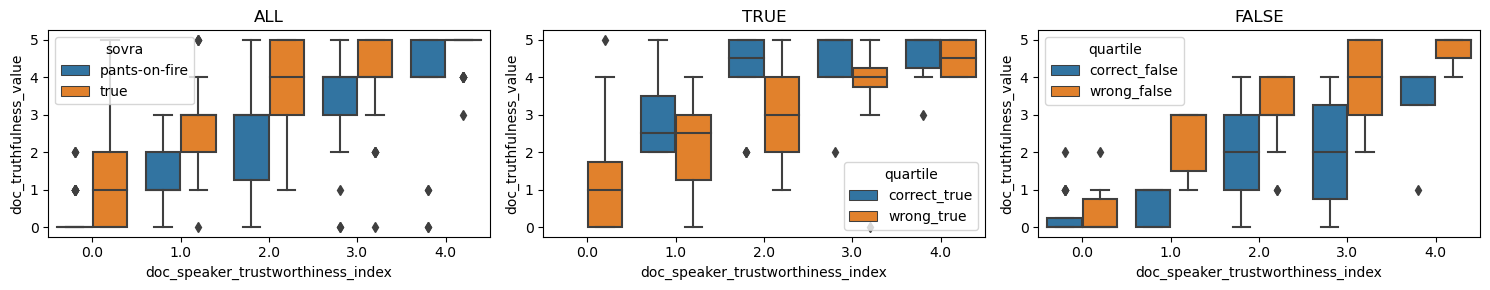

In [34]:
crea_box_plot("doc_speaker_trustworthiness_index","doc_truthfulness_value")

- se lo statement è TRUE: più mi fido dell'autore più mi avvicino al GT
- se lo statement è FAKE: se non mi fido dell'autore tendo ad azzeccare che è una FAKE

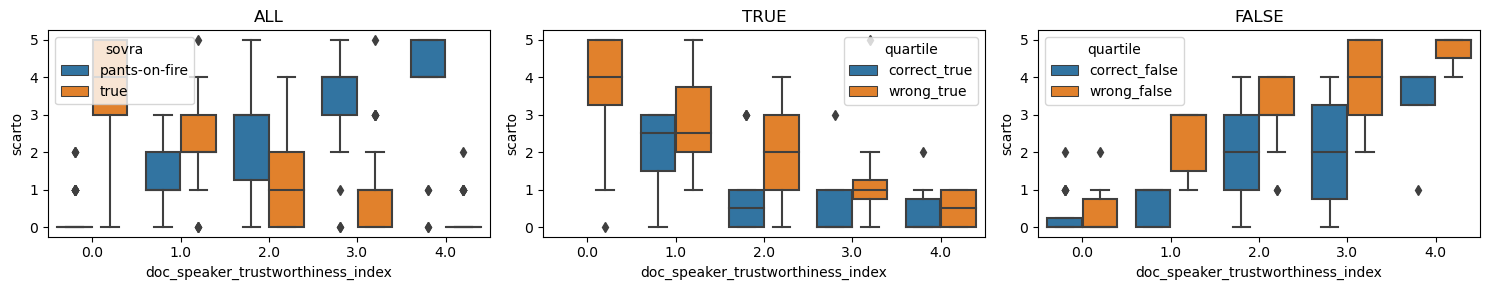

In [35]:
crea_box_plot("doc_speaker_trustworthiness_index","scarto")

- gli statement scritti da DEMOCRATICI ricevono valutazioni in media più alte (indipendentemente dal tipo di statement) 

In [36]:
for df in [["df_all",df_all],["df_false",df_false],["df_true",df_true]]:
    print("-" * 100)
    print(df[0])
    display(df[1].groupby(by="doc_speaker_party").mean()["doc_truthfulness_value"])

----------------------------------------------------------------------------------------------------
df_all


doc_speaker_party
DEM    2.941538
REP    2.495446
Name: doc_truthfulness_value, dtype: float64

----------------------------------------------------------------------------------------------------
df_false


doc_speaker_party
DEM    2.416667
REP    1.705036
Name: doc_truthfulness_value, dtype: float64

----------------------------------------------------------------------------------------------------
df_true


doc_speaker_party
DEM    4.091667
REP    3.312500
Name: doc_truthfulness_value, dtype: float64

- il partito dello scrittore dello statement è rilevante per individuare il gruppo dello statement
=> ciò è anche confermato dal prop-test

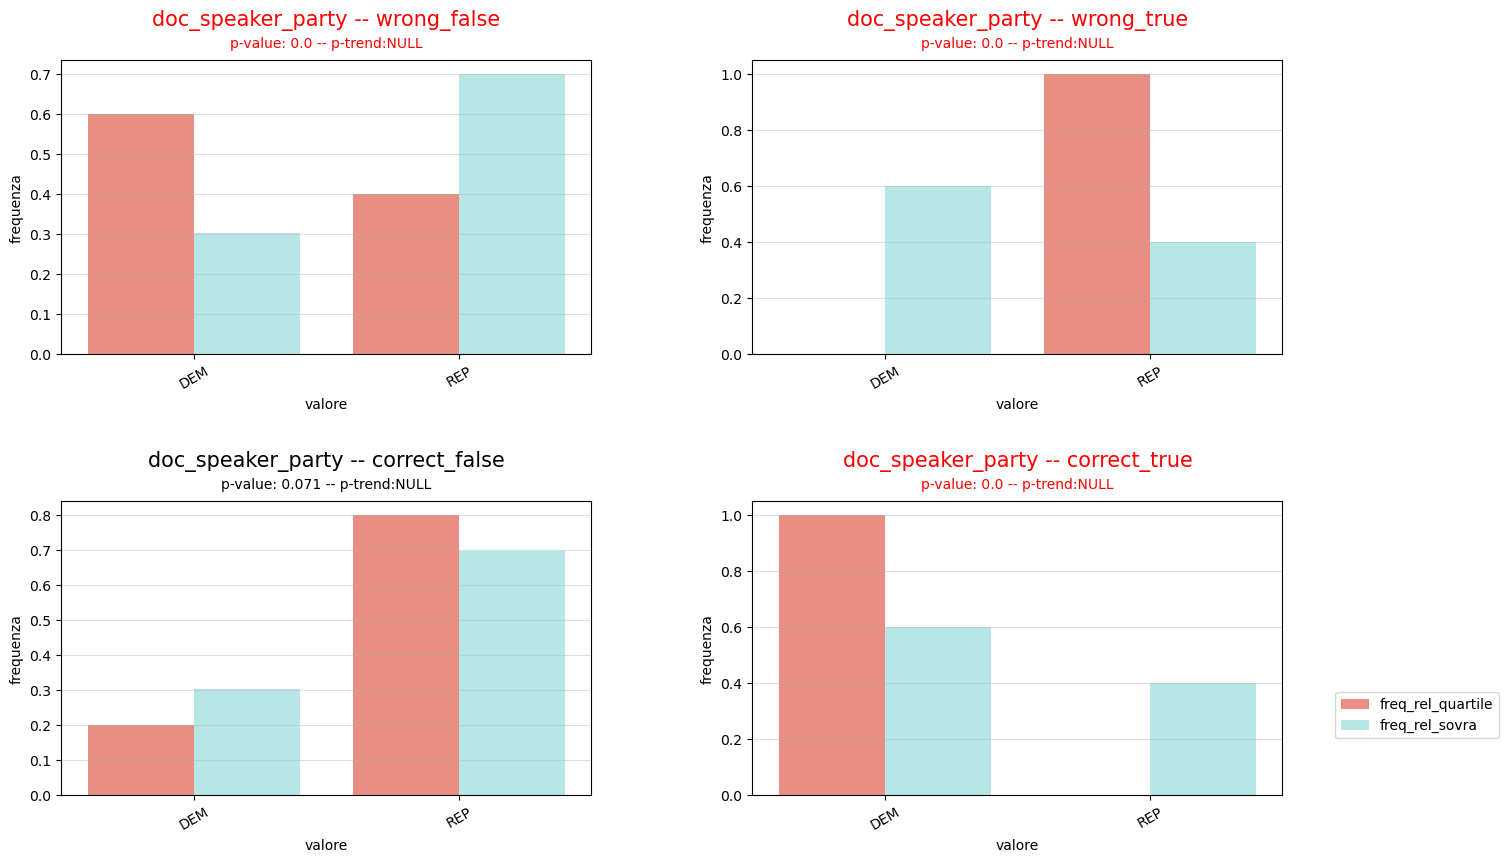

In [37]:
crea_bar_plot_final("doc_speaker_party")

- età e doc_speaker_party posso essere combinate per determinare quartile_val

In [58]:
txt = "(consideration_ans_index + political_views_ans_label + doc_speaker_party) * C(age_ans_label)"
valore_soglia = 0.05
calcola_anova(["quartile_val"],[["df_all",df_all],["df_false",df_false],["df_true",df_true]],txt,valore_soglia)

----------------------------------------------------------------------------------------------------
quartile_val ~ (consideration_ans_index + political_views_ans_label + doc_speaker_party) * C(age_ans_label) in df_all


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(age_ans_label),2733.688347,5.0,546.737669,360.818974,2.445658e-233,0.597273,0.595421
doc_speaker_party,77.494804,1.0,77.494804,51.142618,1.517372e-12,0.016932,0.016595
consideration_ans_index,0.063082,1.0,0.063082,0.041631,8.383611e-01,0.000014,-0.000317


C(age_ans_label)


,group1,group2,meandiff,p-adj,lower,upper,reject


----------------------------------------------------------------------------------------------------
quartile_val ~ (consideration_ans_index + political_views_ans_label + doc_speaker_party) * C(age_ans_label) in df_false


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
doc_speaker_party,10.386173,1.0,10.386173,23.028229,0.000004,0.098587,0.093904
political_views_ans_label:C(age_ans_label),14.912969,25.0,0.596519,1.322602,0.179329,0.141556,0.034380
consideration_ans_index,0.076440,1.0,0.076440,0.169482,0.681100,0.000726,-0.003540


doc_speaker_party


,group1,group2,meandiff,p-adj,lower,upper,reject
0,DEM,REP,0.4772,0.0,0.2708,0.6836,True


----------------------------------------------------------------------------------------------------
quartile_val ~ (consideration_ans_index + political_views_ans_label + doc_speaker_party) * C(age_ans_label) in df_true


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(age_ans_label),336.225609,5.0,67.245122,272.044320,5.804759e-37,0.753491,0.750305
doc_speaker_party,45.424643,1.0,45.424643,183.768219,9.284366e-29,0.101798,0.101188
doc_speaker_party:C(age_ans_label),12.021375,5.0,2.404275,9.726644,3.552045e-08,0.026940,0.024157


doc_speaker_party


,group1,group2,meandiff,p-adj,lower,upper,reject
0,DEM,REP,-1.125,0.0,-1.2662,-0.9838,True


C(age_ans_label)


,group1,group2,meandiff,p-adj,lower,upper,reject


----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


In [39]:
for df in [["df_all",df_all],["df_false",df_false],["df_true",df_true]]:
    print("-" * 100)
    print(df[0])
    display(df[1].groupby(by="age_ans_label").mean()["doc_truthfulness_value"])

----------------------------------------------------------------------------------------------------
df_all


age_ans_label
0-18     2.500000
19-25    2.700000
26-35    2.898305
36-50    2.619490
51-80    2.710145
81+      4.000000
Name: doc_truthfulness_value, dtype: float64

----------------------------------------------------------------------------------------------------
df_false


age_ans_label
0-18     4.000000
19-25    1.600000
26-35    2.423729
36-50    1.619718
51-80    1.826087
81+      4.000000
Name: doc_truthfulness_value, dtype: float64

----------------------------------------------------------------------------------------------------
df_true


age_ans_label
0-18     2.000000
19-25    3.550000
26-35    3.762712
36-50    3.555556
51-80    4.239130
81+      5.000000
Name: doc_truthfulness_value, dtype: float64

<Axes: xlabel='age_ans_label'>

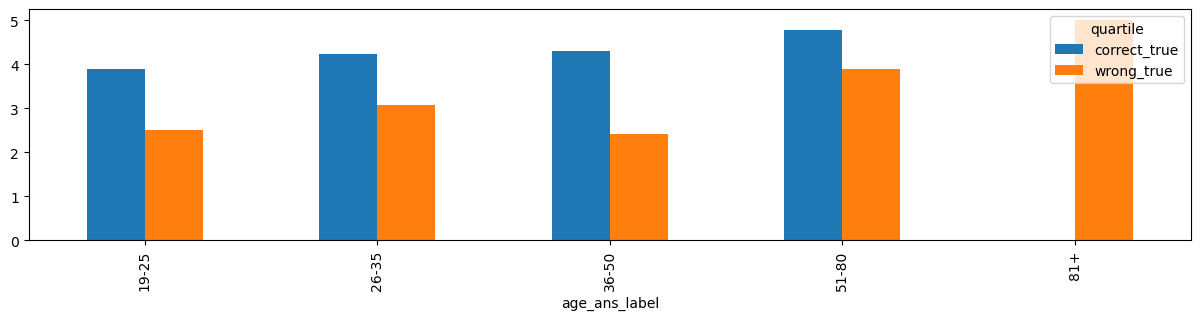

In [40]:
df_true[df_true["quartile"] != "other_true"].groupby(by=["age_ans_label","quartile"]).mean()["doc_truthfulness_value"].unstack().plot(kind="bar",figsize=(15, 3))

- se lo statement viene giudicato come poco accurato si tenderà a dare una valutazione bassa in media
- se invece lo statement viene giudicato come molto accurato si tenderà a dare una valutazione alta in media

In [ ]:
df_all[df_all["doc_speaker_trustworthiness_index"] == 4.0]["doc_truthfulness_value"].mean()

In [95]:
## accuratezza del testo

txt = "(doc_precision_index + doc_completeness_index + doc_informativeness_index)+ doc_unbiasedness_index + doc_accuracy_index + doc_speaker_trustworthiness_index"
valore_soglia = 0.1
calcola_anova(["doc_truthfulness_value"],[["df_all",df_all]],txt,valore_soglia)

----------------------------------------------------------------------------------------------------
doc_truthfulness_value ~ (doc_precision_index + doc_completeness_index + doc_informativeness_index)+ doc_unbiasedness_index + doc_accuracy_index + doc_speaker_trustworthiness_index in df_all


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
doc_accuracy_index,288.784440,1.0,288.784440,231.729986,5.941031e-48,0.157498,0.156712
doc_speaker_trustworthiness_index,56.690103,1.0,56.690103,45.489975,2.386532e-11,0.030918,0.030218
doc_informativeness_index,1.299446,1.0,1.299446,1.042718,3.073975e-01,0.000709,0.000029


doc_accuracy_index


,group1,group2,meandiff,p-adj,lower,upper,reject
3,0.0,4.0,3.4046,0.0,3.1150,3.6942,True
2,0.0,3.0,2.8735,0.0,2.6014,3.1456,True
6,1.0,4.0,2.3929,0.0,2.1026,2.6833,True


doc_speaker_trustworthiness_index


,group1,group2,meandiff,p-adj,lower,upper,reject
3,0.0,4.0,3.3391,0.0,2.9843,3.6939,True
2,0.0,3.0,2.7801,0.0,2.4749,3.0853,True
6,1.0,4.0,2.1430,0.0,1.7885,2.4975,True


----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


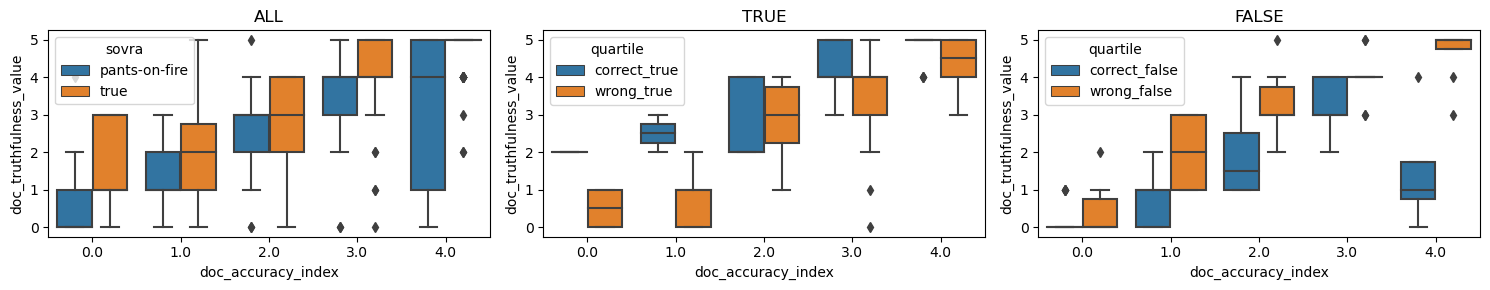

In [42]:
crea_box_plot("doc_accuracy_index","doc_truthfulness_value")

,quartile,doc_accuracy_index
0,correct_false,1.120000
1,correct_true,3.183333
5,wrong_false,2.160000
6,wrong_true,2.400000


<Axes: xlabel='quartile', ylabel='doc_accuracy_index'>

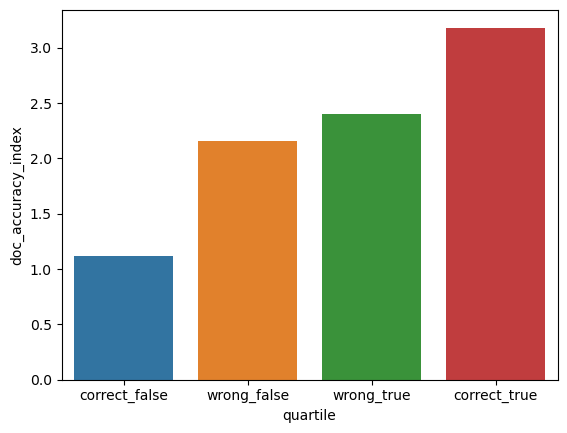

In [43]:
df = df_all.groupby(["quartile"]).mean()["doc_accuracy_index"]
df = df.reset_index(inplace=False)
df = df[(df["quartile"] != "other_true") & (df["quartile"] != "other_false") & (df["quartile"] != "other")]
df.sort_values(by="doc_accuracy_index", ascending=False)
display(df)
sns.barplot(x="quartile", y="doc_accuracy_index", data=df,order=["correct_false","wrong_false","wrong_true","correct_true"])

- Con i statement FALSE ha più importanza la doc_speaker_trustworthiness_index
- Con i statement TRUE ha più importanza la doc_accuracy_index

In [44]:
## confronto tra TRUE e FALSE

txt = "doc_accuracy_index + doc_speaker_trustworthiness_index"
valore_soglia = 0.1
calcola_anova(["doc_truthfulness_value"],[["df_true",df_true],["df_false",df_false]],txt,valore_soglia)

----------------------------------------------------------------------------------------------------
doc_truthfulness_value ~ doc_accuracy_index + doc_speaker_trustworthiness_index in df_true


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
doc_accuracy_index,81.179638,1.0,81.179638,97.000752,7.298248e-19,0.317308,0.313013
doc_speaker_trustworthiness_index,9.790213,1.0,9.790213,11.698230,7.604361e-04,0.038267,0.034882
Residual,164.868708,197.0,0.836897,NaN,NaN,NaN,NaN


doc_accuracy_index


,group1,group2,meandiff,p-adj,lower,upper,reject
3,0.0,4.0,3.2682,0.0,2.4895,4.0469,True
6,1.0,4.0,2.8012,0.0,2.0465,3.5558,True
2,0.0,3.0,2.5235,0.0,1.7388,3.3083,True


----------------------------------------------------------------------------------------------------
doc_truthfulness_value ~ doc_accuracy_index + doc_speaker_trustworthiness_index in df_false


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
doc_speaker_trustworthiness_index,49.762731,1.0,49.762731,40.991004,1.105929e-09,0.161395,0.156840
doc_accuracy_index,20.623409,1.0,20.623409,16.988100,5.549142e-05,0.066888,0.062704
Residual,237.942338,196.0,1.213992,NaN,NaN,NaN,NaN


doc_speaker_trustworthiness_index


,group1,group2,meandiff,p-adj,lower,upper,reject
3,0.0,4.0,3.4391,0.0,2.6567,4.2216,True
2,0.0,3.0,3.1361,0.0,2.4552,3.8170,True
6,1.0,4.0,2.3558,0.0,1.5036,3.2081,True


----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


- analizzando il testo dello statement:

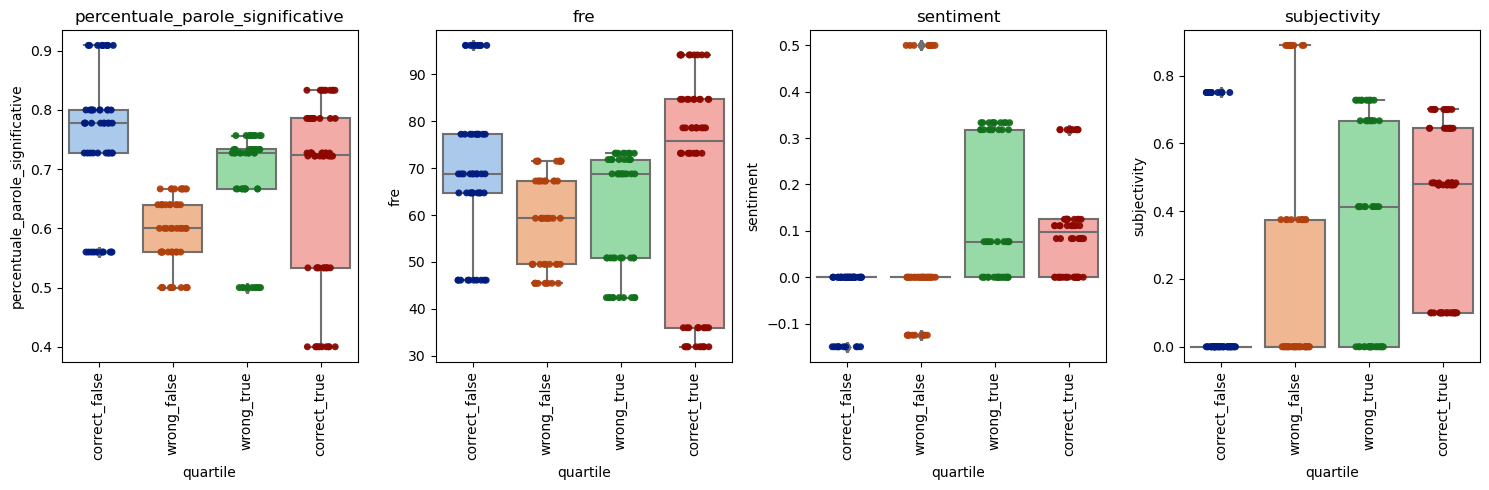

In [45]:
crea_box_plot_statement(["percentuale_parole_significative","fre","sentiment", "subjectivity"])

Notiamo che per quanto riguarda le news false quelle che vengono azzeccate come tali:
- hanno una percentuale di parole significative più alta, un fre maggiore, sentiment negativo e poca subjectivity.
- contrario per le news che vengono classificate male (ricevono punteggio alto nonostante sono false)

In [46]:
## STATEMENT FALSE

txt = "(subjectivity_label  + sentiment_label) * percentuale_parole_significative_label * fre_label"
valore_soglia = 0.05
calcola_anova(["quartile_val"],[["df_all",df_all],["df_false",df_false]],txt,valore_soglia)

----------------------------------------------------------------------------------------------------
quartile_val ~ (subjectivity_label  + sentiment_label) * percentuale_parole_significative_label * fre_label in df_all


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
subjectivity_label:percentuale_parole_significative_label:fre_label,478.553074,16.0,29.909567,33.369085,1.598127e-52,0.238346,0.231100
sentiment_label:fre_label,171.605446,4.0,42.901361,47.863587,1.056119e-20,0.085469,0.083646
sentiment_label:percentuale_parole_significative_label:fre_label,128.790656,8.0,16.098832,17.960918,5.284703e-20,0.064145,0.060547


sentiment_label:fre_label
['sentiment_label', 'fre_label']


,group1,group2,meandiff,p-adj,lower,upper,reject
16,negative:media,neutral:bassa,1.4615,0.0,0.8800,2.0431,True
3,negative:alta,neutral:bassa,1.3333,0.0,0.6642,2.0025,True
30,neutral:media,positive:alta,1.3250,0.0,1.0028,1.6472,True


subjectivity_label:percentuale_parole_significative_label:fre_label
['subjectivity_label', 'percentuale_parole_significative_label', 'fre_label']


,group1,group2,meandiff,p-adj,lower,upper,reject
9,alta:media:alta,media-alta:alta:bassa,6.0,0.0,4.3582,7.6418,True
5,alta:media:alta,bassa:bassa:bassa,6.0,0.0,4.3582,7.6418,True
19,alta:media:alta,media:alta:alta,5.0,0.0,3.5781,6.4219,True


sentiment_label:percentuale_parole_significative_label:fre_label
['sentiment_label', 'percentuale_parole_significative_label', 'fre_label']


,group1,group2,meandiff,p-adj,lower,upper,reject
25,negative:alta:media,neutral:bassa:bassa,4.000,0.0,2.5042,5.4958,True
42,negative:media:alta,neutral:bassa:bassa,3.400,0.0,2.0621,4.7379,True
112,neutral:alta:media,neutral:bassa:bassa,3.375,0.0,2.0796,4.6704,True


----------------------------------------------------------------------------------------------------
quartile_val ~ (subjectivity_label  + sentiment_label) * percentuale_parole_significative_label * fre_label in df_false


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
subjectivity_label,195.394235,4.0,48.848559,237.722432,2.219501e-63,0.484208,0.481925
sentiment_label,77.383554,2.0,38.691777,188.294261,4.671044e-30,0.191765,0.190649
subjectivity_label:percentuale_parole_significative_label:fre_label,25.816676,4.0,6.454169,31.409335,5.504084e-20,0.063976,0.061908


subjectivity_label


,group1,group2,meandiff,p-adj,lower,upper,reject
2,alta,media-alta,0.8333,0.0002,0.3049,1.3618,True
0,alta,bassa,0.5917,0.0030,0.1464,1.0371,True
6,bassa,media-bassa,-0.5917,0.0030,-1.0371,-0.1464,True


sentiment_label


,group1,group2,meandiff,p-adj,lower,upper,reject
2,neutral,positive,-0.334,0.0268,-0.6371,-0.0309,True


subjectivity_label:percentuale_parole_significative_label:fre_label
['subjectivity_label', 'percentuale_parole_significative_label', 'fre_label']


,group1,group2,meandiff,p-adj,lower,upper,reject
9,alta:media:alta,media-alta:alta:bassa,6.0,0.0,4.3582,7.6418,True
5,alta:media:alta,bassa:bassa:bassa,6.0,0.0,4.3582,7.6418,True
19,alta:media:alta,media:alta:alta,5.0,0.0,3.5781,6.4219,True


----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


In [47]:
df_false.groupby("quartile").mean()[["percentuale_parole_significative","fre","sentiment", "subjectivity"]].reset_index(inplace=False)

,quartile,percentuale_parole_significative,fre,sentiment,subjectivity
0,correct_false,0.754828,70.598000,-0.030000,0.150000
1,other_false,0.647294,60.149596,0.050084,0.385101
2,wrong_false,0.593333,58.588000,0.075000,0.252778


Notiamo che per quanto riguarda le news vere quelle che vengono azzeccate come tali (correct):
- hanno un fre maggiore, sentiment minore e più subjectivity.
- contrario per le news positive che vengono classificate male (ricevono punteggio basso nonostante sono vere)


In [74]:
####################### TESI

txt = "(subjectivity_label  + sentiment_label) * percentuale_parole_significative_label * fre_label"
valore_soglia = 0.1
calcola_anova(["quartile_val"],[["df_all",df_all]],txt,valore_soglia)

----------------------------------------------------------------------------------------------------
quartile_val ~ (subjectivity_label  + sentiment_label) * percentuale_parole_significative_label * fre_label in df_all


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
subjectivity_label:percentuale_parole_significative_label:fre_label,478.553074,16.0,29.909567,33.369085,1.598127e-52,0.238346,0.231100
sentiment_label:fre_label,171.605446,4.0,42.901361,47.863587,1.056119e-20,0.085469,0.083646
sentiment_label:percentuale_parole_significative_label:fre_label,128.790656,8.0,16.098832,17.960918,5.284703e-20,0.064145,0.060547


subjectivity_label:percentuale_parole_significative_label:fre_label
['subjectivity_label', 'percentuale_parole_significative_label', 'fre_label']


,group1,group2,meandiff,p-adj,lower,upper,reject
9,alta:media:alta,media-alta:alta:bassa,6.0,0.0,4.3582,7.6418,True
5,alta:media:alta,bassa:bassa:bassa,6.0,0.0,4.3582,7.6418,True
19,alta:media:alta,media:alta:alta,5.0,0.0,3.5781,6.4219,True


----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


In [67]:
df_all[(df_all["subjectivity_label"] == "alta") & 
       (df_all["percentuale_parole_significative_label"] == "media") &
       (df_all["fre_label"] == "alta")]["doc_truthfulness_value"].mean()

3.0

In [72]:
df_all[(df_all["subjectivity_label"] == "bassa") & 
       (df_all["percentuale_parole_significative_label"] == "bassa") &
       (df_all["fre_label"] == "bassa")]["doc_truthfulness_value"].mean()

4.4

##### RELAZIONI

Verifico se lo scrittore di un determinato partito politico ha delle caratteristiche specifiche con cui scrive lo statement

In [50]:
## relazione tra il partito dello scrittore e le caratteristiche del testo

txt = "(subjectivity_label * sentiment_label * fre_label  + numero_parole_frase)* percentuale_parole_significative_label "
valore_soglia = 0.12
calcola_anova(["doc_speaker_party_val"],[["df_all",df_all],["df_true",df_true],["df_false",df_all]],txt,valore_soglia)

----------------------------------------------------------------------------------------------------
doc_speaker_party_val ~ (subjectivity_label * sentiment_label * fre_label  + numero_parole_frase)* percentuale_parole_significative_label  in df_all


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
subjectivity_label:sentiment_label:fre_label,81.435545,16.0,5.089722,30.411389,1.344348e-13,0.166573,0.161041
subjectivity_label:sentiment_label:fre_label:percentuale_parole_significative_label,52.693576,32.0,1.646674,9.838977,3.071822e-17,0.107783,0.096795
subjectivity_label:fre_label:percentuale_parole_significative_label,41.420372,16.0,2.588773,15.468074,2.347963e-07,0.084724,0.079219


subjectivity_label:sentiment_label:fre_label
['subjectivity_label', 'sentiment_label', 'fre_label']


,group1,group2,meandiff,p-adj,lower,upper,reject
118,bassa:negative:alta,media-bassa:neutral:media,1.0,0.0002,0.2599,1.7401,True
117,bassa:negative:alta,media-bassa:negative:media,1.0,0.0000,0.4149,1.5851,True
334,media-alta:positive:media,media-bassa:negative:media,1.0,0.0000,0.5468,1.4532,True


----------------------------------------------------------------------------------------------------
doc_speaker_party_val ~ (subjectivity_label * sentiment_label * fre_label  + numero_parole_frase)* percentuale_parole_significative_label  in df_false


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
subjectivity_label:sentiment_label:fre_label,81.435545,16.0,5.089722,30.411389,1.344348e-13,0.166573,0.161041
subjectivity_label:sentiment_label:fre_label:percentuale_parole_significative_label,52.693576,32.0,1.646674,9.838977,3.071822e-17,0.107783,0.096795
subjectivity_label:fre_label:percentuale_parole_significative_label,41.420372,16.0,2.588773,15.468074,2.347963e-07,0.084724,0.079219


subjectivity_label:sentiment_label:fre_label
['subjectivity_label', 'sentiment_label', 'fre_label']


,group1,group2,meandiff,p-adj,lower,upper,reject
118,bassa:negative:alta,media-bassa:neutral:media,1.0,0.0002,0.2599,1.7401,True
117,bassa:negative:alta,media-bassa:negative:media,1.0,0.0000,0.4149,1.5851,True
334,media-alta:positive:media,media-bassa:negative:media,1.0,0.0000,0.5468,1.4532,True


----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


In [51]:
df_all.groupby("doc_speaker_party").mean()[["percentuale_parole_significative","fre","sentiment", "subjectivity","numero_parole_frase"]].T

doc_speaker_party,DEM,REP
percentuale_parole_significative,0.668931,0.676539
fre,62.598000,61.266685
sentiment,0.055445,0.054306
subjectivity,0.312102,0.237803
numero_parole_frase,18.107692,17.267760


In [52]:
df_false.groupby("doc_speaker_party").mean()[["percentuale_parole_significative","fre","sentiment", "subjectivity","numero_parole_frase"]].T

doc_speaker_party,DEM,REP
percentuale_parole_significative,0.611287,0.682107
fre,67.108333,60.342518
sentiment,0.062500,0.024880
subjectivity,0.310648,0.285072
numero_parole_frase,17.500000,19.568345


In [53]:
df_true.groupby("doc_speaker_party").mean()[["percentuale_parole_significative","fre","sentiment", "subjectivity","numero_parole_frase"]].T

doc_speaker_party,DEM,REP
percentuale_parole_significative,0.677153,0.693654
fre,62.851667,68.011250
sentiment,0.152346,0.108068
subjectivity,0.392814,0.282727
numero_parole_frase,15.500000,14.875000


In [54]:
## relazione tra l'accuratezza di un testo e le altre caratteristiche del testo

txt = "(doc_comprehensibility_index + doc_confidence_index + doc_precision_index + doc_completeness_index + doc_informativeness_index) * doc_unbiasedness_index"
valore_soglia = 0.05
calcola_anova(["doc_accuracy_index"],[["df_all",df_all],["df_true",df_true],["df_false",df_all]],txt,valore_soglia)

----------------------------------------------------------------------------------------------------
doc_accuracy_index ~ (doc_comprehensibility_index + doc_confidence_index + doc_precision_index + doc_completeness_index + doc_informativeness_index) * doc_unbiasedness_index in df_all


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
doc_unbiasedness_index,309.468776,1.0,309.468776,387.906494,6.075332e-75,0.223513,0.222809
doc_informativeness_index,88.284720,1.0,88.284720,110.661297,8.329366e-25,0.063763,0.063151
doc_completeness_index,15.785576,1.0,15.785576,19.786576,9.471182e-06,0.011401,0.010819


doc_informativeness_index


,group1,group2,meandiff,p-adj,lower,upper,reject
3,0.0,4.0,2.8692,0.0,2.5447,3.1937,True
6,1.0,4.0,2.1450,0.0,1.8798,2.4101,True
2,0.0,3.0,2.0373,0.0,1.7184,2.3561,True


doc_unbiasedness_index


,group1,group2,meandiff,p-adj,lower,upper,reject
3,0.0,4.0,2.7493,0.0,2.5012,2.9973,True
2,0.0,3.0,2.2251,0.0,1.9738,2.4764,True
6,1.0,4.0,1.8017,0.0,1.5352,2.0683,True


----------------------------------------------------------------------------------------------------
doc_accuracy_index ~ (doc_comprehensibility_index + doc_confidence_index + doc_precision_index + doc_completeness_index + doc_informativeness_index) * doc_unbiasedness_index in df_true


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
doc_unbiasedness_index,22.497762,1.0,22.497762,32.073997,5.487380e-08,0.126896,0.122455
doc_informativeness_index,12.397480,1.0,12.397480,17.674501,4.050006e-05,0.069927,0.065710
doc_confidence_index,3.918825,1.0,3.918825,5.586884,1.911579e-02,0.022104,0.018076


doc_informativeness_index


,group1,group2,meandiff,p-adj,lower,upper,reject
6,1.0,4.0,2.1364,0.0,1.5235,2.7492,True
8,2.0,4.0,1.6429,0.0,1.0185,2.2672,True
5,1.0,3.0,1.5792,0.0,0.9537,2.2047,True


doc_unbiasedness_index


,group1,group2,meandiff,p-adj,lower,upper,reject
3,0.0,4.0,2.4141,0.0,1.7249,3.1034,True
2,0.0,3.0,2.1869,0.0,1.4767,2.8970,True
6,1.0,4.0,1.3605,0.0,0.7780,1.9430,True


----------------------------------------------------------------------------------------------------
doc_accuracy_index ~ (doc_comprehensibility_index + doc_confidence_index + doc_precision_index + doc_completeness_index + doc_informativeness_index) * doc_unbiasedness_index in df_false


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
doc_unbiasedness_index,309.468776,1.0,309.468776,387.906494,6.075332e-75,0.223513,0.222809
doc_informativeness_index,88.284720,1.0,88.284720,110.661297,8.329366e-25,0.063763,0.063151
doc_completeness_index,15.785576,1.0,15.785576,19.786576,9.471182e-06,0.011401,0.010819


doc_informativeness_index


,group1,group2,meandiff,p-adj,lower,upper,reject
3,0.0,4.0,2.8692,0.0,2.5447,3.1937,True
6,1.0,4.0,2.1450,0.0,1.8798,2.4101,True
2,0.0,3.0,2.0373,0.0,1.7184,2.3561,True


doc_unbiasedness_index


,group1,group2,meandiff,p-adj,lower,upper,reject
3,0.0,4.0,2.7493,0.0,2.5012,2.9973,True
2,0.0,3.0,2.2251,0.0,1.9738,2.4764,True
6,1.0,4.0,1.8017,0.0,1.5352,2.0683,True


----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


<Axes: xlabel='doc_unbiasedness_index', ylabel='doc_accuracy_index'>

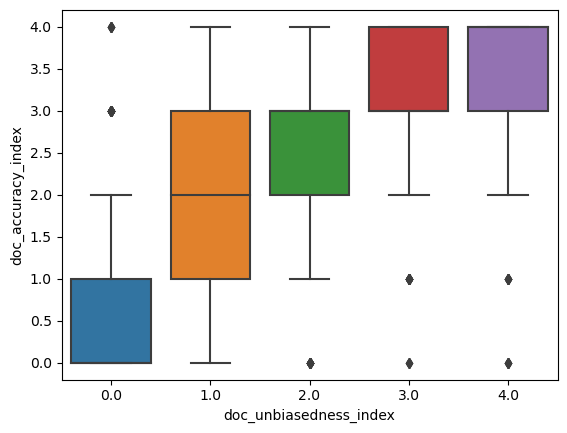

In [55]:
sns.boxplot(x="doc_unbiasedness_index", y="doc_accuracy_index", data=df_all)

<Axes: xlabel='doc_precision_index', ylabel='doc_accuracy_index'>

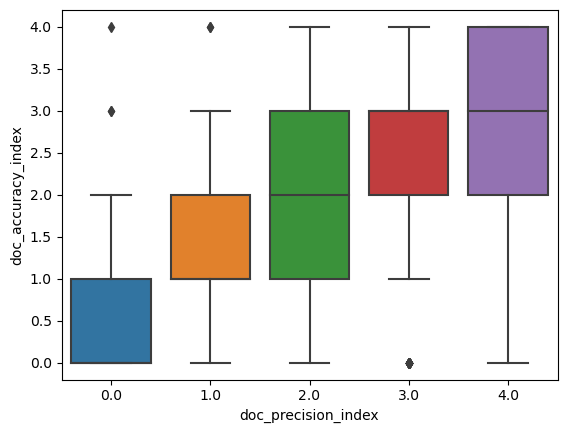

In [56]:
sns.boxplot(x="doc_precision_index", y="doc_accuracy_index", data=df_all)

In [57]:
for df in [["df_all",df_all]]:
    print("-" * 100)
    print(df[0])
    df = pd.DataFrame(df[1].groupby("quartile").mean()[["doc_speaker_party_val","doc_precision_index","doc_unbiasedness_index","doc_accuracy_index","doc_speaker_trustworthiness_index","percentuale_parole_significative","numero_parole_frase","fre","sentiment", "subjectivity"]].reset_index(inplace=False))    
    df = df[(df["quartile"] != "other_true") & (df["quartile"] != "other_false") & (df["quartile"] != "other")].T
    df.columns = df.iloc[0].values.tolist()
    df = df.drop(df.index[0])
    
    
    display(df[["correct_false"	, "wrong_false","wrong_true","correct_true"	]])

----------------------------------------------------------------------------------------------------
df_all


,correct_false,wrong_false,wrong_true,correct_true
doc_speaker_party_val,0.2,0.6,0.0,1.0
doc_precision_index,2.42,2.66,2.72,3.216667
doc_unbiasedness_index,0.88,1.66,1.8,2.716667
doc_accuracy_index,1.12,2.16,2.4,3.183333
doc_speaker_trustworthiness_index,1.1,2.16,1.96,2.833333
percentuale_parole_significative,0.754828,0.593333,0.676806,0.666979
numero_parole_frase,14.2,22.6,16.6,13.333333
fre,70.598,58.588,61.396,66.405
sentiment,-0.03,0.075,0.145636,0.106271
subjectivity,0.15,0.252778,0.361455,0.417508
